In [1]:
import cv2
from func import *
import os
import matplotlib.pyplot as plt
cfg=config(backbone='34')
net = get_net(cfg=cfg,backbone='34')
def tuple_maker(list_of_string):
    output=[]
    for i in range(0,len(list_of_string),2):
        if '-' in list_of_string[i] or '-' in list_of_string[i+1]:
            continue
        pair=(round(float(list_of_string[i])),round(float(list_of_string[i+1])))
        output.append(pair)
    return output
def get_coords(name,root="C:\\Users\\ASUS\\Desktop\\all\\Ultra-Fast-Lane-Detection-v2\\testing\\New folder",net=net):
    with open(os.path.join(root,name+".lines.txt"), 'r', encoding='utf-8') as file:
        lines = [line.rstrip('\n') for line in file.readlines()]
    c_gt=[]
    for line in lines:
        elements = line.split()   
        pairs = tuple_maker(elements)
        c_gt.append(pairs)
    img=cv2.imread(os.path.join(root,name+'.jpg'))
    c_pred,e_pred=make_predict(net,img,cfg,out='coords',exist_list=True)
    return c_gt,c_pred,e_pred
def vis(coords,name,root="C:\\Users\\ASUS\\Desktop\\all\\Ultra-Fast-Lane-Detection-v2\\testing\\New folder",marker='circle'):
    img=cv2.imread(os.path.join(root,name+'.jpg'))
    img_re=cv2.resize(img,(1640, 590))
    if marker=='circle':
        for lane in coords:
            for coord in lane:
                cv2.circle(img_re,coord,5,(0,255,0),-1)
        plt.imshow(img_re)
    elif marker=='line':
        for lane in coords:
            for i in range(len(lane)-1):
                cv2.line(img_re, lane[i], lane[i+1], (0, 255, 0), thickness=30) 
        plt.imshow(img_re)
c_gt,c_pred,e_pred=get_coords('00020')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [1]:
# Example string
original_string = "/driver_23_30frame/05171102_0766.MP4/00020.jpg"

# Replace '.jpg' with '.txt'
new_string = original_string.replace('.jpg', '.txt')

# Print the modified string
print(new_string)


/driver_23_30frame/05171102_0766.MP4/00020.txt


In [2]:
line="/driver_23_30frame/05171102_0766.MP4/00020.jpg /laneseg_label_w16/driver_23_30frame/05171102_0766.MP4/00020.png 1 1 1 0"
def existence_reader(line):
    splitted=line.split()
    existence_list=[int(x) for x in splitted[-4:]]
    return existence_list
def IoU_calc(gt,pred):
    width = 1640
    height = 590
    blank_image_1 = np.zeros((height, width), dtype=np.uint8)
    blank_image_2 = np.zeros((height, width), dtype=np.uint8)
    for i in range(len(gt)-1):
        cv2.line(blank_image_1, gt[i], gt[i+1], 1, thickness=30)
    for i in range(len(pred)-1):
        cv2.line(blank_image_2, pred[i], pred[i+1], 1, thickness=30)
    intersection=np.count_nonzero(np.logical_and(blank_image_1, blank_image_2)==1)
    union=np.count_nonzero(np.logical_or(blank_image_1, blank_image_2)==1)
    IoU=intersection/union
    return IoU
def conmat_calc(e_gt,e_pred,c_gt,c_pred):
    FP=0
    FN=0
    TP=0
    for i in range(4):
        if e_gt[i]==0:
            c_gt.insert(i,False)
        if e_pred[i]==0:
            c_pred.insert(i,False)
    for i in range(4):
        if e_gt[i]==1 and e_pred[i]==1:
            IoU=IoU_calc(c_gt[i],c_pred[i])
            if IoU >= 0.3:
                TP+=1
            else: FN+=1
        if e_gt[i]==1 and e_pred[i]==0:
            FN+=1
        if e_gt[i]==0 and e_pred[i]==1:
            FP+=1
    return TP,FP,FN
def F1_score(TP,FP,FN,beta=1):
    precision=(TP/(TP+FP))
    recall=(TP/(TP+FN))
    F1=(1+beta**2)*((precision*recall)/(precision*(beta**2)+recall))
    return F1

         


In [4]:
e_gt=existence_reader(line)
TP,FP,FN=conmat_calc(e_gt,e_pred,c_gt,c_pred)
F1=F1_score(TP,FP,FN)
F1

1.0

In [50]:
len(c_pred)

TypeError: object of type 'bool' has no len()

In [93]:
width = 1640
height = 590
    # Create a blank image
blank_image_1 = np.zeros((height, width), dtype=np.uint8)
blank_image_2 = np.zeros((height, width), dtype=np.uint8)
gt=2
pr=1
for i in range(len(c_gt[gt])-1):
    cv2.line(blank_image_1, c_gt[gt][i], c_gt[gt][i+1], 1, thickness=30)
for i in range(len(c_pred[pr])-1):
    cv2.line(blank_image_2, c_pred[pr][i], c_pred[pr][i+1], 1, thickness=30)
intersection=np.count_nonzero(np.logical_and(blank_image_1, blank_image_2)==1)
union=np.count_nonzero(np.logical_or(blank_image_1, blank_image_2)==1)
IoU=intersection/union
IoU

0.7864790087814267

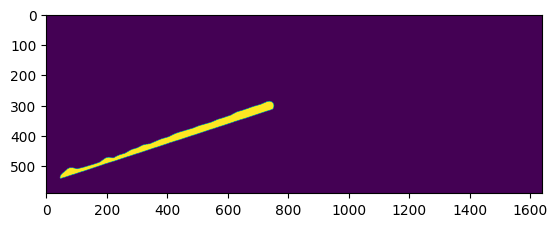

In [91]:
plt.imshow(np.logical_and(blank_image_1, blank_image_2)==1)

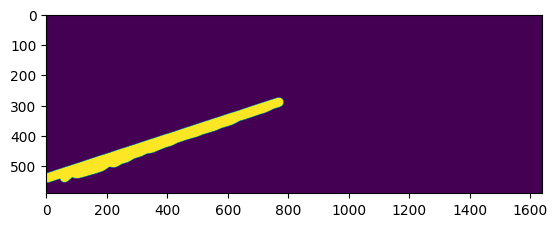

In [92]:
plt.imshow(np.logical_or(blank_image_1, blank_image_2)==1)

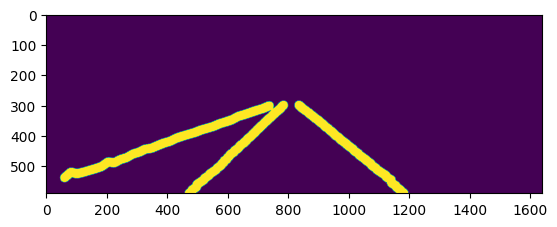

In [78]:
for j in range(3):
    for i in range(len(c_pred[j])-1):
        cv2.line(blank_image_2, c_pred[j][i], c_pred[j][i+1], 1, thickness=30)
plt.imshow(blank_image_2)

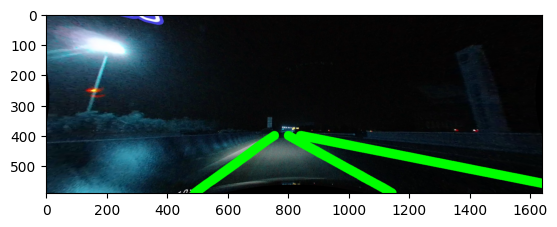

In [112]:
vis(gt,'04410',marker='line')

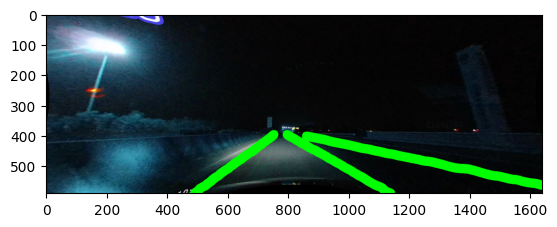

In [113]:
vis(pred,'04410',marker='line')

In [3]:

img=cv2.imread("C:\\Users\\ASUS\\Desktop\\all\\Ultra-Fast-Lane-Detection-v2\\testing\\New folder\\04410.jpg")
pred=make_predict(net=net,cfg=cfg,img=img,out='pred')

In [4]:
from func import pred2coords
row_anchor = np.linspace(0.42,1, 72)
col_anchor = np.linspace(0,1, 81) 
coor,exist=pred2coords(pred,row_anchor=row_anchor,col_anchor=col_anchor,exist_list=True)


In [5]:
exist

[0, 1, 1, 1]

In [115]:
print(pred.keys())
for key in pred.keys():
    print(pred[key].shape)
    print('--------------------')

dict_keys(['loc_row', 'loc_col', 'exist_row', 'exist_col'])
torch.Size([1, 200, 72, 4])
--------------------
torch.Size([1, 100, 81, 4])
--------------------
torch.Size([1, 2, 72, 4])
--------------------
torch.Size([1, 2, 81, 4])
--------------------


In [1]:
line="/driver_23_30frame/05171102_0766.MP4/00020.jpg /laneseg_label_w16/driver_23_30frame/05171102_0766.MP4/00020.png 1 1 1 0"
def eval_reader(line,root='D:\\CLRNet\\data\\CULane'):
    splitted=line.split()
    file_name=splitted[0]
    file_dir=root+file_name
    existence_list=[int(x) for x in splitted[-4:]]
    return file_dir,existence_list


('D:\\CLRNet\\data\\CULane/driver_23_30frame/05171102_0766.MP4/00020.jpg',
 [1, 1, 1, 0])

In [1]:
from eva_tool import *
from func import *
import cv2

cfg=config(backbone='34')
net = get_net(cfg=cfg,backbone='34')

eval_list = []
with open("D:\\CLRNet\\data\\CULane\\list\\val_gt.txt", 'r',encoding='utf-8') as file:
    for line in file:
        eval_list.append(line.strip())

TPs=0
FPs=0
FNs=0
for line in eval_list:
    img_dir,e_gt=eval_reader(line)
    img=cv2.imread(img_dir)
    c_gt,c_pred,e_pred=get_coords(img_dir,net,cfg)
    TP,FP,FN= conmat_calc(e_gt,e_pred,c_gt,c_pred)
    TPs+=TP
    FPs+=FP
    FNs+=FN
F1=F1_score(TPs,FPs,FNs,beta=1)
F1


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


0.6666666666666666

In [4]:
F1_score(TPs,FPs,FNs,beta=1)

0.8540068534850147

In [2]:
from eva_tool import *
from func import *
import cv2
cfg=config(backbone='18')
net = get_net(cfg=cfg,backbone='18')

eval_list = []
with open("D:\\CLRNet\\data\\CULane\\list\\val_gt.txt", 'r',encoding='utf-8') as file:
    for line in file:
        eval_list.append(line.strip())

TPs=0
FPs=0
FNs=0
for line in eval_list:
    img_dir,e_gt=eval_reader(line)
    img=cv2.imread(img_dir)
    c_gt,c_pred,e_pred=get_coords(img_dir,net,cfg)
    TP,FP,FN= conmat_calc(e_gt,e_pred,c_gt,c_pred)
    TPs+=TP
    FPs+=FP
    FNs+=FN
F1=F1_score(TPs,FPs,FNs,beta=1)
F1

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


0.8460394914038861